Вариант 5
x      y (факт)   y_lin      y_quad     y_cubic   
-------------------------------------------------------
4.80   —          3.067      1.400      -2.333    
4.90   —          3.081      1.995      0.239     
5.00   2.0        3.095      2.500      2.056     
5.20   4.0        3.124      3.243      3.865     
5.40   4.0        3.152      3.629      3.984     
5.60   3.0        3.181      3.657      3.302     
5.80   3.0        3.210      3.329      2.706     
6.00   3.0        3.238      2.643      3.087     
6.10   —          3.252      2.166      3.922     
6.20   —          3.267      1.600      5.333     
6.30   —          3.281      0.945      7.434     

MSE на исходных данных:
  Линейная:     0.4698
  Квадратичная: 0.2714
  Кубическая:   0.0344


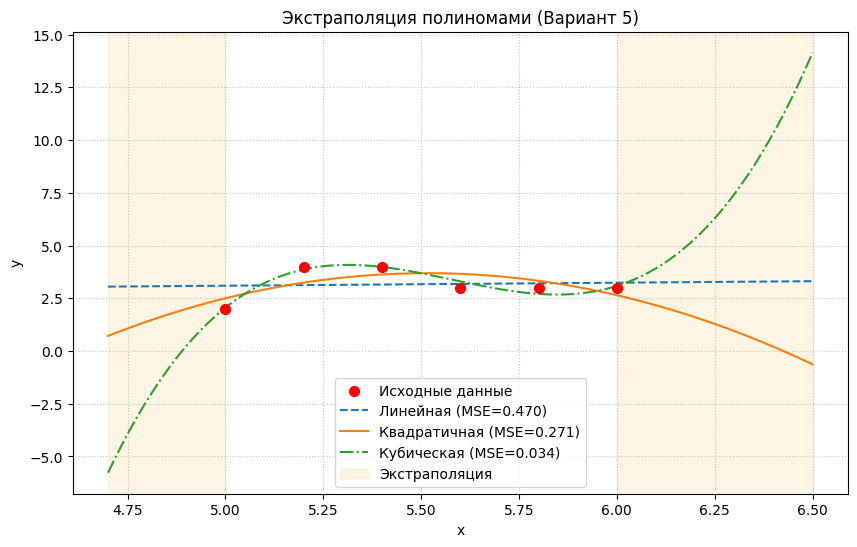

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# === ЗАДАЧА 1 ===
# Представить собственные данные и построить экстраполяция полиномами
# первой, второй и третьей степени.

VARIANT = 5

variants = {
    1: ([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [3.0, 6.0, 3.0, 6.0, 4.0, 3.0]),
    2: ([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [5.0, 5.0, 4.0, 4.0, 6.0, 6.0]),
    3: ([3.0, 3.2, 3.4, 3.6, 3.8, 4.0], [2.0, 3.0, 3.0, 3.0, 2.0, 4.0]),
    4: ([3.0, 3.2, 3.4, 3.6, 3.8, 4.0], [6.0, 2.0, 6.0, 4.0, 3.0, 4.0]),
    5: ([5.0, 5.2, 5.4, 5.6, 5.8, 6.0], [2.0, 4.0, 4.0, 3.0, 3.0, 3.0]),
    6: ([4.0, 4.2, 4.4, 4.6, 4.8, 5.0], [4.0, 3.0, 6.0, 6.0, 4.0, 4.0]),
    7: ([1.0, 1.2, 1.4, 1.6, 1.8, 2.0], [2.0, 6.0, 4.0, 4.0, 2.0, 5.0]),
    8: ([5.0, 5.2, 5.4, 5.6, 5.8, 6.0], [3.0, 2.0, 5.0, 2.0, 2.0, 3.0]),
    9: ([2.0, 2.2, 2.4, 2.6, 2.8, 3.0], [4.0, 2.0, 4.0, 2.0, 5.0, 2.0]),
    10: ([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [6.0, 3.0, 2.0, 6.0, 2.0, 5.0]),
}

x_orig, y_orig = variants[VARIANT]
x_orig = np.array(x_orig)
y_orig = np.array(y_orig)

poly1 = np.poly1d(np.polyfit(x_orig, y_orig, 1))
poly2 = np.poly1d(np.polyfit(x_orig, y_orig, 2))
poly3 = np.poly1d(np.polyfit(x_orig, y_orig, 3))

mse1 = mean_squared_error(y_orig, poly1(x_orig))
mse2 = mean_squared_error(y_orig, poly2(x_orig))
mse3 = mean_squared_error(y_orig, poly3(x_orig))

x_min, x_max = x_orig.min(), x_orig.max()
x_ext = np.linspace(x_min - 0.3, x_max + 0.5, 100)  # экстраполяция слева и справа

x_table = np.array([x_min - 0.2, x_min - 0.1] + x_orig.tolist() + [x_max + 0.1, x_max + 0.2, x_max + 0.3])
y_true_table = ["—"] * 2 + y_orig.tolist() + ["—"] * 3  # истинных значений вне диапазона нет

print(f"Вариант {VARIANT}")
print(f"{'x':<6} {'y (факт)':<10} {'y_lin':<10} {'y_quad':<10} {'y_cubic':<10}")
print("-" * 55)

for i, xi in enumerate(x_table):
    y_fact = y_true_table[i]
    y1 = poly1(xi)
    y2 = poly2(xi)
    y3 = poly3(xi)
    print(f"{xi:<6.2f} {str(y_fact):<10} {y1:<10.3f} {y2:<10.3f} {y3:<10.3f}")

print(f"\nMSE на исходных данных:")
print(f"  Линейная:     {mse1:.4f}")
print(f"  Квадратичная: {mse2:.4f}")
print(f"  Кубическая:   {mse3:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(x_orig, y_orig, color='red', label='Исходные данные', zorder=5, s=50)

plt.plot(x_ext, poly1(x_ext), '--', label=f'Линейная (MSE={mse1:.3f})')
plt.plot(x_ext, poly2(x_ext), '-', label=f'Квадратичная (MSE={mse2:.3f})')
plt.plot(x_ext, poly3(x_ext), '-.', label=f'Кубическая (MSE={mse3:.3f})')

# Выделим зону экстраполяции
plt.axvspan(x_min - 0.3, x_min, color='orange', alpha=0.1, label='Экстраполяция')
plt.axvspan(x_max, x_max + 0.5, color='orange', alpha=0.1)

plt.title(f"Экстраполяция полиномами (Вариант {VARIANT})")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

Уравнение регрессии: y = 9449.96 * x + 25792.20
MSE: 31270951.72


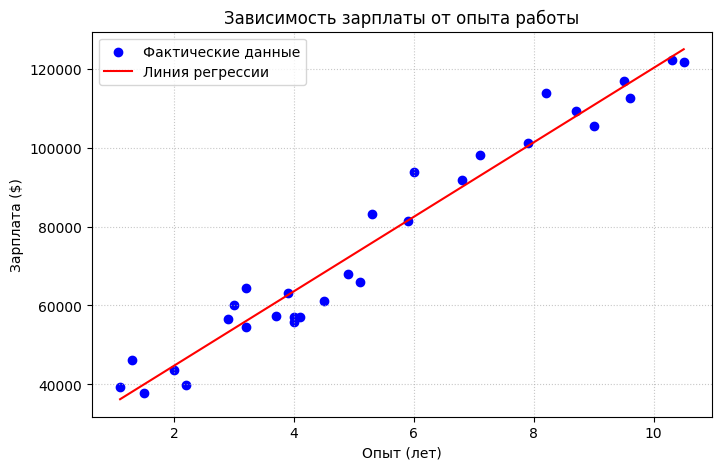

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# === ЗАДАЧА 2 ===
# Построить модель простой линейной регрессии для данных "заработная плата vs опыт".
# Источник: https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv
# Найти коэффициенты, построить прогноз и график.

url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
data = pd.read_csv(url)

x = data[["YearsExperience"]].values  # признак (опыт)
y = np.array(data["Salary"].values)  # целевая переменная (зарплата)

model = LinearRegression()
model.fit(x, y)

intercept = model.intercept_ # свободный член
slope = model.coef_[0] # 
print(f"Уравнение регрессии: y = {slope:.2f} * x + {intercept:.2f}")

y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
print(f"MSE: {mse:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color="blue", label="Фактические данные")
plt.plot(x, y_pred, color="red", label="Линия регрессии")
plt.title("Зависимость зарплаты от опыта работы")
plt.xlabel("Опыт (лет)")
plt.ylabel("Зарплата ($)")
plt.legend()
plt.grid(True, linestyle=":", alpha=0.7)
plt.show()

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# === ЗАДАЧА 3 ===
# Построить модель множественной линейной регрессии на данных о красном вине.
# Целевая переменная: quality (качество от 0 до 10)
# Признаки: все остальные числовые колонки.
# Найти коэффициенты, MSE и R².

# Загрузка данных
url = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
data = pd.read_csv(url, sep=",")

x = data.drop("quality", axis=1)
y = data["quality"]

# Разделение на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Обучение модели
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Коэффициенты модели (признак → вес):")
for feature, coef in zip(x.columns, model.coef_):
    print(f"  {feature:15s} → {coef:8.4f}")

print(f"\nСвободный член (intercept): {model.intercept_:.4f}")
print(f"MSE на тесте: {mse:.4f}")
print(f"Коэффициент детерминации R²: {r2:.4f}")

Коэффициенты модели (признак → вес):
  fixed acidity   →   0.0231
  volatile acidity →  -1.0013
  citric acid     →  -0.1408
  residual sugar  →   0.0066
  chlorides       →  -1.8065
  free sulfur dioxide →   0.0056
  total sulfur dioxide →  -0.0036
  density         → -10.3516
  pH              →  -0.3937
  sulphates       →   0.8412
  alcohol         →   0.2819

Свободный член (intercept): 14.3551
MSE на тесте: 0.3900
Коэффициент детерминации R²: 0.4032


Подобранные параметры:
  b0 = -3331.2609
  b1 = 3335.7783
  b2 = 0.0003
MSE = 1.6897


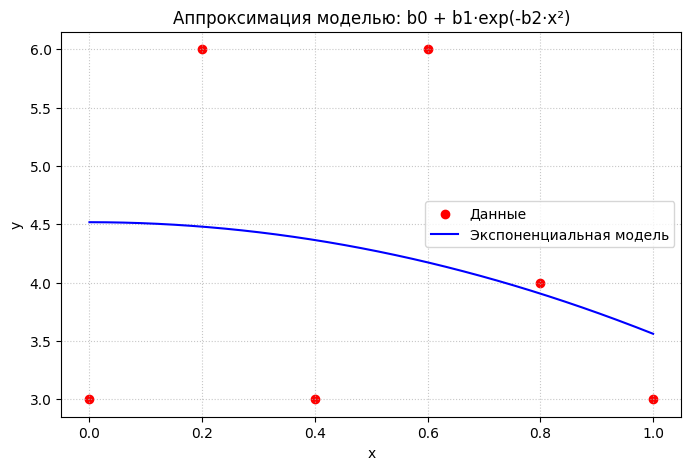

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

# === ЗАДАЧА 4 ===
# Проверить гипотезу, что экспериментальные данные описываются моделью:
# f(x) = b0 + b1 * exp(-b2 * x^2)
# Использовать нелинейную регрессию (curve_fit).

x_data = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y_data = np.array([3.0, 6.0, 3.0, 6.0, 4.0, 3.0])


def model_func(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)


try:
    optimal, covariance = curve_fit(model_func, x_data, y_data, p0=[3.0, 3.0, 1.0])
    b0, b1, b2 = optimal
    y_pred = model_func(x_data, *optimal)
    mse = mean_squared_error(y_data, y_pred)

    print(f"Подобранные параметры:")
    print(f"  b0 = {b0:.4f}")
    print(f"  b1 = {b1:.4f}")
    print(f"  b2 = {b2:.4f}")
    print(f"MSE = {mse:.4f}")

    # График
    x_plot = np.linspace(x_data.min(), x_data.max(), 200)
    y_plot = model_func(x_plot, *optimal)

    plt.figure(figsize=(8, 5))
    plt.scatter(x_data, y_data, color="red", label="Данные")
    plt.plot(x_plot, y_plot, "b-", label="Экспоненциальная модель")
    plt.title("Аппроксимация моделью: b0 + b1·exp(-b2·x²)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True, linestyle=":", alpha=0.7)
    plt.show()

except Exception as e:
    print("Не удалось подобрать параметры:", e)

Результаты подбора моделей:
1) Линейная:       MSE = 2.9619
2) Квадратичная:   MSE = 2.3190
3) Логарифмическая: MSE = 2.3376
4) Степенная:       MSE = 2.3280


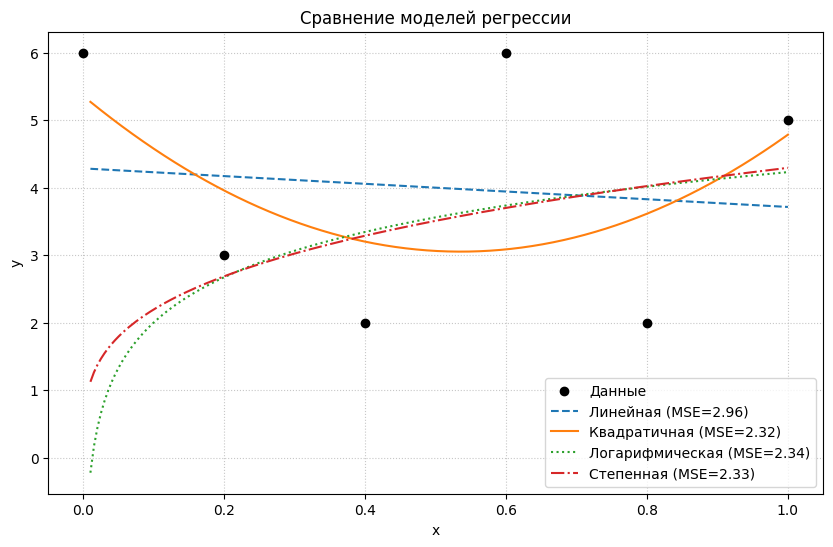

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

# === ЗАДАЧА 5 (со звездочкой) ===
# Проверить 4 гипотезы о виде зависимости:
# 1) Линейная
# 2) Квадратичная
# 3) Логарифмическая: y = b0 + b1 * ln(x)
# 4) Степенная: y = b0 * x^b1
# Использовать данные (исключая x=0 для моделей 3 и 4).

# Данные (Вариант 10)
x = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = np.array([6.0, 3.0, 2.0, 6.0, 2.0, 5.0])

mask = x > 0  # для моделей 3 и 4 - только положительные значения
x_positive = x[mask]
y_positive = y[mask]

# --- Модель 1: линейная ---
coeffs1 = np.polyfit(x, y, 1)
y_pred1 = np.polyval(coeffs1, x)
mse1 = mean_squared_error(y, y_pred1)

# --- Модель 2: квадратичная ---
coeffs2 = np.polyfit(x, y, 2)
y_pred2 = np.polyval(coeffs2, x)
mse2 = mean_squared_error(y, y_pred2)


# --- Модель 3: логарифмическая ---
def log_model(x, b0, b1):
    return b0 + b1 * np.log(x)


try:
    popt3, _ = curve_fit(log_model, x_positive, y_positive, p0=[1, 1])
    y_pred3_full = np.full_like(y, np.nan)
    y_pred3_full[mask] = log_model(x_positive, *popt3)
    mse3 = mean_squared_error(y_positive, log_model(x_positive, *popt3))
except:
    mse3 = np.nan
    popt3 = None


# --- Модель 4: степенная ---
def power_model(x, b0, b1):
    return b0 * np.power(x, b1)


try:
    popt4, _ = curve_fit(power_model, x_positive, y_positive, p0=[1, 1])
    y_pred4_full = np.full_like(y, np.nan)
    y_pred4_full[mask] = power_model(x_positive, *popt4)
    mse4 = mean_squared_error(y_positive, power_model(x_positive, *popt4))
except:
    mse4 = np.nan
    popt4 = None

print("Результаты подбора моделей:")
mse3_str = f"{mse3:.4f}" if not np.isnan(mse3) else "—"
mse4_str = f"{mse4:.4f}" if not np.isnan(mse4) else "—"

print(f"1) Линейная:       MSE = {mse1:.4f}")
print(f"2) Квадратичная:   MSE = {mse2:.4f}")
print(f"3) Логарифмическая: MSE = {mse3_str}")
print(f"4) Степенная:       MSE = {mse4_str}")

x_plot = np.linspace(0.01, 1.0, 200)
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="black", label="Данные", zorder=5)

plt.plot(x_plot, np.polyval(coeffs1, x_plot), "--", label=f"Линейная (MSE={mse1:.2f})")
plt.plot(
    x_plot, np.polyval(coeffs2, x_plot), "-", label=f"Квадратичная (MSE={mse2:.2f})"
)

if popt3 is not None:
    plt.plot(
        x_plot,
        log_model(x_plot, *popt3),
        ":",
        label=f"Логарифмическая (MSE={mse3:.2f})",
    )
if popt4 is not None:
    plt.plot(
        x_plot, power_model(x_plot, *popt4), "-.", label=f"Степенная (MSE={mse4:.2f})"
    )

plt.xlabel("x")
plt.ylabel("y")
plt.title("Сравнение моделей регрессии")
plt.legend()
plt.grid(True, linestyle=":", alpha=0.7)
plt.show()